In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [248]:
df = pd.read_csv('prices.csv')
df.head()

,size,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [249]:
df_norm = (df - df.mean()) / df.std()
df_norm.head()

,size,bedroom,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [250]:
n_features = len(df_norm.columns) - 1
n_features

2

In [251]:
w = np.random.rand(1, n_features + 1)
w

array([[0.7599936 , 0.38858615, 0.7939663 ]])

In [252]:
x = np.array(df_norm.drop('price', axis=1))
y = df_norm.iloc[:, 2:3].values

In [253]:
def insert_ones(x):
    ones = np.ones([x.shape[0], 1])
    return np.concatenate((ones,x), axis=1)

In [254]:
def costf(w, x, y):
    n = float(len(x))
    error = (x@w.T - y)
    cost = np.sum(np.power(error, 2))
    return cost/n

In [255]:
def gradient_descent(w, x, y, alpha, interations):
    
    cost = np.zeros(interations)
    
    for i in range(interations):
        
        '''predict = np.dot(x, w.T) # or x@w.T
        error = predict - y
        error_x = error * x
        
        sum_ = np.sum(error_x, axis=0)
        gradient = (alpha/float(len(x))) * sum_
        w = w - gradient
        
        cost = cost(w, x, y)'''
        
        w = w - (alpha/float(len(x)) * np.sum((x@w.T - y)*x, axis = 0))
        cost[i] = costf(w, x, y)
                 
    return w, cost

In [256]:
x = insert_ones(x)
alpha = 0.01
interations = 1000

In [257]:
w, cost = gradient_descent(w, x, y, alpha, interations)

In [258]:
costf(w, x, y)

0.2614422478052887

Text(0.5, 1.0, 'Error vs. Interations')

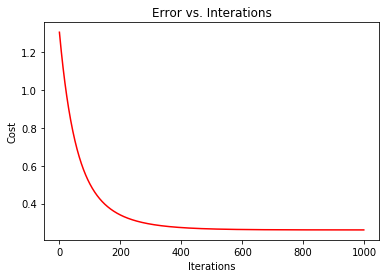

In [259]:
fig, ax = plt.subplots()  
ax.plot(np.arange(interations), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Interations')

In [260]:
w

array([[ 3.28098716e-05,  8.75797228e-01, -4.42099872e-02]])